<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Hi again, Adam! Thank you for the fixes, everything is fine now! Good luck in the next project :)
</div>

<b>Reviewer's comment</b>

Hello, Adam! My name is Andrey Isupov. I checked your project. You did a very good job on the project. But there are few things that need fix. I think it is not so difficult for you and you will quickly cope with it. Good luck :)

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Sample text
</div>

# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Thanks for the description
</div>

## Initialization

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns
from scipy import stats

In [2]:
from platform import python_version 
python_version()



'3.9.5'

### Load data

In [3]:
# Load data
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')
except:
    df = pd.read_csv('datasets/vehicles_us.csv')

In [4]:
#Test if the CSV loaded correctly
display(df.head(15))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [5]:
# print the general/summary information about the DataFrame
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,51525.0,12132.464920,10040.803015,1.0,5000.0,9000.0,16839.0,375000.0
model_year,47906.0,2009.750470,6.282065,1908.0,2006.0,2011.0,2014.0,2019.0
cylinders,46265.0,6.125235,1.660360,3.0,4.0,6.0,8.0,12.0
odometer,43633.0,115553.461738,65094.611341,0.0,70000.0,113000.0,155000.0,990000.0
is_4wd,25572.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
days_listed,51525.0,39.554760,28.204270,0.0,19.0,33.0,53.0,271.0


In [7]:
### Data Type
# date_posted should probably be a date type, not an object.
# model_year should be an int not a float

In [8]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [9]:
#filter a NaN only table
df_nan = df[df.isna().any(axis=1)]
df_nan.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [10]:
### NaN
# Quite a few NaN entries in the data
# 25k missing data points on 4wd ! 
# That's almost half of the data set!

# Looking closer at 4wd, It looks like the Nan values should actually be zeros. 
# Let's take a closer look.

In [11]:
print(df.is_4wd.value_counts())
print(df.is_4wd.isna().sum())

1.0    25572
Name: is_4wd, dtype: int64
25953


In [12]:
# Yep, 1's and NaN. Should be 1's and 0's.
# We'll add that too our list.

### Conclusions and further steps

In [13]:
### Data Type
# date_posted should probably be a date type, not an object.
# model_year should be an int not a float

#NaN
# 4wd will convert NaN to 0
# model_year, cylinders, odometer, paint_color are going to be more difficult.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good data review
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You can use markdown cells for your comments :)
</div>

## Treat missing values (if any)

In [14]:
# Convert 4wd NaN to 0
df['is_4wd'] = df['is_4wd'].fillna(0)

In [15]:
#Test
df['is_4wd'].isna().sum()

0

In [16]:
#filter a NaN only table
df_nan_2 = df[df.isna().any(axis=1)]
#df_nan_2.head()

#Copy our DataFrame
data = df
data_test = df

In [17]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


In [18]:
df.shape , data.shape

((51525, 13), (51525, 13))

In [19]:
# Def function to solve for NaN values in model_year

def cal_model_median(row):
    """
    Based on model, return a median model_yaer.
    """
    model = row['model']
    try: 
        median_value = data[(data['model'] == model)].median()
        return median_value
    except:
        return
    

In [20]:
#apply the formula to rows with missing data, replace with median value based on function.
#target model_year NaN

data.loc[data['model_year'].isna(), 'model_year'] = data[data['model_year'].isna()].apply(cal_model_median, axis=1)

#convert floats to int
data['model_year'] = data['model_year'].astype(int)

#test
print(data['model_year'].isna().sum())


0


In [21]:
# NaN values in 'cylinders'

data.loc[data['cylinders'].isna(), 'cylinders'] = data[data['cylinders'].isna()].apply(cal_model_median, axis=1)


#test
print(data['cylinders'].isna().sum())

0


In [22]:
# Nan values in paint_color - paint color is pure preference, so rather than fill with an arbitrary color, 
# We'll use 'unknown' so it's clear we've filled the value manually. 

data['paint_color'] = data['paint_color'].fillna('unknown')
#test
print(data['paint_color'].isna().sum())
#print((data['paint_color'] == 'unknown').sum())

0


In [23]:
# NaN values in 'odometer' NaN

data.loc[data['odometer'].isna(), 'odometer'] = data[data['odometer'].isna()].apply(cal_model_median, axis=1)


#test
#print(data['odometer'].isna().sum())

In [24]:
#test
print(data['odometer'].isna().sum())

41


In [25]:
# Why is 'odometer' returning 41 NaN values? 
# We expect 0...

In [26]:
#filter a NaN only table
df_odo_nan = (data[data['odometer'].isnull()])
df_odo_nan = df_odo_nan.reset_index()

# Review New DataFrame
display(len(df_odo_nan))



41

In [27]:
display(df_odo_nan.head())

,index,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,42,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-01-15,16
1,1642,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-04,36
2,2232,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-08-23,70
3,2731,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-04-12,31
4,4149,34900,2013,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-10-12,28


In [28]:
# Interesting. For some reason all of the 
# model: mercedes-benz benze sprinter 2500 
# did not update their  median odometer readings.


In [29]:
# How many "mercedes-benz benze sprinter 2500" are in the original data?

mercedes_count = (data['model'] == 'mercedes-benz benze sprinter 2500')
print(mercedes_count.sum())

41


In [30]:
# As expected - 41, the same as our NaN count, 
# None of the mercedes-benz benze sprinter 2500 have an 'odometer' reading,
# Consequently, we can't generate a mean for the model.

# They are also all model_year 2013
# And they are ALL in excellent condition...
# They are all Black or had Missing color values - which we filled with NaN
# And the same price of $34900

# But they have different upload dates...

# Was the same Sprinter Van uploaded 41 seperate times?


In [31]:
# What is the median odometer reading for our data set?

print(data['odometer'].median())
print(data['odometer'].mean())

115376.0
115338.06197070934


In [32]:
# Mean and Median Odometer readings for the dataframe are fairly close together - that's good
# However, we can probably get a more precise number for our sprinter Van by dialing in 
# on the specific year of the mercedes-benz in question

In [33]:
# Filter all of the 2013 data into a new dataframe

year_2013 = data[data['model_year'] == 2013]
year_2013['model_year']

# Check median and mean 'odometer' scores for the year
print(year_2013['odometer'].median())
print(year_2013['odometer'].mean())

101245.0
103548.83569440931


In [34]:
# replace missing NaN odometer 'mercedes-benz benze sprinter 2500' 
# values with 2013 mean value (rounted to nearest whole number

data.loc[(data['model'] == 'mercedes-benz benze sprinter 2500'), 'odometer'] = 103548 # Set to the mean value of 2013

# Test
#display(data.loc[(data['model'] == 'mercedes-benz benze sprinter 2500'), :])


In [35]:
# Quite a rabit trail we went down to sort out the missing values for that 1 / 41 mercedes-benz benze sprinter vans
# They seem to be different adds for the same Van based on startdate, so I'm going to leave this in the data
# for now. But I think we've learned something important here about our data set, 
# although I'm not quite sure what it is, yet...


In [36]:
#test
print(data['odometer'].isna().sum())

0


In [37]:
# End of Section Sanity Check
display(data.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,121928.0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good work!
</div>

## Fix data types

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 5.1+ MB


In [39]:
# # Convert 4wd from float to int

# data['is_4wd'] = data['is_4wd'].astype(bool)

# # Test
# data['is_4wd'].dtypes

# Convert 4wd from float to int   -> fixing the error

data['is_4wd'] = data['is_4wd'].astype(int)

# Test
data['is_4wd'].dtypes

dtype('int64')

In [40]:
# Convert cylinders from float to int

data['cylinders'] = data['cylinders'].astype(int)

# Test
data['cylinders'].dtypes

dtype('int64')

In [41]:
# Convert odometer from float to int

data['odometer'] = data['odometer'].astype(int)

# Test
data['odometer'].dtypes

dtype('int64')

In [42]:
#Convert date_posted from object to date type

data['date_posted'] = pd.to_datetime(data['date_posted'])

#test
#display(data.head())
#print()
print(data['date_posted'].dtypes)

datetime64[ns]


In [43]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,unknown,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28


In [44]:
# Create new Column: days_listed as datetime object - days
data['days_listed_dt_delta'] = pd.to_timedelta(data['days_listed'], unit='d')

#test
print(data['days_listed_dt_delta'].dtype)

timedelta64[ns]


In [45]:
# End of Section 
display(data.head())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_listed_dt_delta
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,19 days
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,50 days
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,79 days
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,unknown,0,2019-03-22,9,9 days
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,28 days


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Everything is right
</div>

## Enrich data

In [46]:
# Add datetime values for when the ad was placed

data['datetime_days_listed'] = (data['date_posted'] + data['days_listed_dt_delta'])

# Test
print(data['datetime_days_listed'].dtype)
#display(data.head())

datetime64[ns]


In [47]:
# Add the vehicle's age when the ad was placed

data['vehicle_age_when_placed'] = (data['date_posted'].dt.year - data['model_year'])
#data['add_placed_vehicle_age'] = pd.to_datetime(data['add_placed_vehicle_age'], yearfirst=True)

# Test
print(data['vehicle_age_when_placed'].head())
#display(data.head())
print(data['vehicle_age_when_placed'].dtype)

0     7
1     7
2     6
3    16
4     2
Name: vehicle_age_when_placed, dtype: int64
int64


In [48]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_listed_dt_delta,datetime_days_listed,vehicle_age_when_placed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,19 days,2018-07-12,7
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,50 days,2018-12-08,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,79 days,2019-04-27,6
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,unknown,0,2019-03-22,9,9 days,2019-03-31,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,28 days,2019-04-30,2


In [49]:
# Add the vehicle's average mileage per year

# We'll start by building a pivot table
pivot_table_vehicle = data.pivot_table(index=['model'], columns = 'model_year', values = 'odometer', aggfunc= 'mean')

# Test
#pd.set_option('display.max_rows', 50)
display(pivot_table_vehicle)


model_year,1908,1929,1936,1948,1949,1954,1955,1958,1960,1961,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
model,,,,,,,,,,,,,,,,,,,,,
acura tl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,128990.857143,172676.300000,108384.296296,113270.555556,110713.000000,NaN,NaN,NaN,NaN,NaN
bmw x5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,110835.733333,106974.111111,90756.625000,87984.937500,91770.333333,64774.727273,81570.000000,71682.000000,15750.000000,NaN
buick enclave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122617.300000,128585.500000,113660.057143,120970.423077,105294.333333,90640.861111,74695.200000,20104.500000,10618.500000,NaN
cadillac escalade,129176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130245.150000,119763.392857,81249.950000,106312.833333,146553.000000,80212.764706,62480.714286,68844.777778,25495.666667,9000.000000
chevrolet camaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86428.027027,92652.026316,69360.720000,79342.740741,60819.770833,59764.700000,36301.866667,35982.538462,16024.542857,29975.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
toyota sienna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,148901.400000,129405.137931,138834.250000,121913.142857,79878.222222,75162.478261,98683.250000,57627.416667,23471.285714,5000.000000
toyota tacoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,124307.515789,122028.687500,110060.685714,113418.434783,96681.641509,80256.018182,62216.155556,57863.934783,29277.533333,4168.333333
toyota tundra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,131448.951220,145198.818182,128619.541667,118905.382353,94865.357143,73029.387097,57041.065217,47003.645161,26973.700000,NaN


In [50]:
pivot_table_vehicle.columns

Int64Index([1908, 1929, 1936, 1948, 1949, 1954, 1955, 1958, 1960, 1961, 1962,
            1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
            1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
            1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
            1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019],
           dtype='int64', name='model_year')

In [51]:
def cal_odometer_mean(row):
    """
    Based on year and model return an category appropriate median value for odometer
    
    """
    
    car = row['model']
    year = row['model_year']
    odo = row['odometer']
    
    try: 
        mean_value = pivot_table_vehicle[(pivot_table_vehicle.index == car)][year].values[0]
#        if pivot_table_vehicle.loc[(pivot_table_vehicle['model'] == car) & (pivot_table_vehicle['model_year'] == year)]:
#            median_value = odo
#            return median_value
        #mean_value = data[(data['model'] == car) & (data['model_year'] == year)]
        return mean_value
    except:
        return

In [52]:
%%time
#apply the formula to all rows, create a new category with mean milage data based on car and car year

data['odometer_mean'] = data.apply(cal_odometer_mean, axis=1)
#data['odometer_mean'] = data.apply(cal_odometer_mean, axis=1)


CPU times: user 12.8 s, sys: 237 ms, total: 13 s
Wall time: 13 s


In [53]:
# It might help to replace the condition values with something that can be manipulated more easily

# Taking a closer look:

data['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [54]:
# Dictionary and map function to create numeric values for the 'condition' categories. Stored in new column - data['numeric_condition']

category_map = {
    'salvage' : 1,
    'fair' : 2,
    'good' : 3,
    'like new' : 4,
    'excellent' : 5,
    'new' : 6
}

data['numeric_condition'] = data['condition'].map(category_map)

In [55]:
# Section End Test
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_listed_dt_delta,datetime_days_listed,vehicle_age_when_placed,odometer_mean,numeric_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,19 days,2018-07-12,7,106974.111111,3
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,50 days,2018-12-08,7,128403.014528,3
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,79 days,2019-04-27,6,109013.549020,4
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,unknown,0,2019-03-22,9,9 days,2019-03-31,16,169081.214286,2
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,28 days,2019-04-30,2,81927.250000,5


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Right
</div>

## Check clean data

In [56]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   price                    51525 non-null  int64          
 1   model_year               51525 non-null  int64          
 2   model                    51525 non-null  object         
 3   condition                51525 non-null  object         
 4   cylinders                51525 non-null  int64          
 5   fuel                     51525 non-null  object         
 6   odometer                 51525 non-null  int64          
 7   transmission             51525 non-null  object         
 8   type                     51525 non-null  object         
 9   paint_color              51525 non-null  object         
 10  is_4wd                   51525 non-null  int64          
 11  date_posted              51525 non-null  datetime64[ns] 
 12  days_listed       

In [57]:
# NaN Check
data.isna().sum()

price                      0
model_year                 0
model                      0
condition                  0
cylinders                  0
fuel                       0
odometer                   0
transmission               0
type                       0
paint_color                0
is_4wd                     0
date_posted                0
days_listed                0
days_listed_dt_delta       0
datetime_days_listed       0
vehicle_age_when_placed    0
odometer_mean              0
numeric_condition          0
dtype: int64

In [58]:
# print a sample of data
data.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_listed_dt_delta,datetime_days_listed,vehicle_age_when_placed,odometer_mean,numeric_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,19 days,2018-07-12,7,106974.111111,3
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,50 days,2018-12-08,7,128403.014528,3
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,79 days,2019-04-27,6,109013.549020,4
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,unknown,0,2019-03-22,9,9 days,2019-03-31,16,169081.214286,2
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,28 days,2019-04-30,2,81927.250000,5


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [59]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,days_listed_dt_delta,vehicle_age_when_placed,odometer_mean,numeric_condition
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,6.121067,115328.672741,0.496303,39.55476,39 days 13:18:51.248908297,8.513906,115328.672741,4.026298
std,10040.803015,6.099381,1.657457,60615.413734,0.499991,28.20427,28 days 04:54:08.916817944,6.112976,40397.827725,1.013431
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,0 days 00:00:00,0.000000,0.000000,1.000000
25%,5000.000000,2007.000000,4.000000,77100.000000,0.000000,19.00000,19 days 00:00:00,4.000000,90733.962963,3.000000
50%,9000.000000,2011.000000,6.000000,115256.000000,0.000000,33.00000,33 days 00:00:00,8.000000,119517.313433,4.000000
75%,16839.000000,2014.000000,8.000000,148177.000000,1.000000,53.00000,53 days 00:00:00,12.000000,142042.909091,5.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,271 days 00:00:00,110.000000,496400.000000,6.000000


In [60]:
# How does correlation look accross our dataframe?
data.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,vehicle_age_when_placed,odometer_mean,numeric_condition
price,1.000000,0.412969,0.300342,-0.386162,0.315145,-0.000682,-0.411694,-0.440689,0.146477
model_year,0.412969,1.000000,-0.148119,-0.433772,0.039103,-0.005321,-0.997147,-0.650859,0.221598
cylinders,0.300342,-0.148119,1.000000,0.095293,0.407298,0.003181,0.147765,0.148535,-0.061355
odometer,-0.386162,-0.433772,0.095293,1.000000,0.045786,0.002434,0.432329,0.666461,-0.199684
is_4wd,0.315145,0.039103,0.407298,0.045786,1.000000,0.002003,-0.039203,0.078752,0.030049
days_listed,-0.000682,-0.005321,0.003181,0.002434,0.002003,1.000000,0.006160,0.005416,0.000517
vehicle_age_when_placed,-0.411694,-0.997147,0.147765,0.432329,-0.039203,0.006160,1.000000,0.648338,-0.221229
odometer_mean,-0.440689,-0.650859,0.148535,0.666461,0.078752,0.005416,0.648338,1.000000,-0.178466
numeric_condition,0.146477,0.221598,-0.061355,-0.199684,0.030049,0.000517,-0.221229,-0.178466,1.000000


In [61]:
## Correlation Summary

# Model year and price have a strong correlation at .4, that's as expected and probably a good baseline for us.
# Price and cylinders have a favorable correlation at .3 - people like musscle cars.
# 4 wheel drive also correlates favorably with price at .3
# cylinders and 4wd have a strong correlation at .4

# odometer has a strong negative correlation with price and model_year at -0.38 and -0.4. 
# That's probably to be expected, as a higher orometer reading will correleate with both a lower price
# and an earlier model year.

# add_placed_vehicle_age has a strong negative correleation with price. Older cars sell for less, as expected.

# I was hoping for more information from days_listed... We'll consider this further as we move forward.

In [62]:
data.columns

Index(['price', 'model_year', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'transmission', 'type', 'paint_color', 'is_4wd',
       'date_posted', 'days_listed', 'days_listed_dt_delta',
       'datetime_days_listed', 'vehicle_age_when_placed', 'odometer_mean',
       'numeric_condition'],
      dtype='object')

In [63]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_listed_dt_delta,datetime_days_listed,vehicle_age_when_placed,odometer_mean,numeric_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,19 days,2018-07-12,7,106974.111111,3
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,50 days,2018-12-08,7,128403.014528,3
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,79 days,2019-04-27,6,109013.549020,4
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,unknown,0,2019-03-22,9,9 days,2019-03-31,16,169081.214286,2
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,28 days,2019-04-30,2,81927.250000,5


price
Skew : 3.59


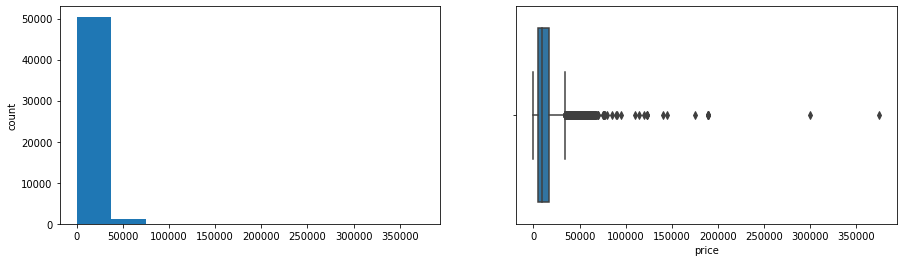

cylinders
Skew : 0.0


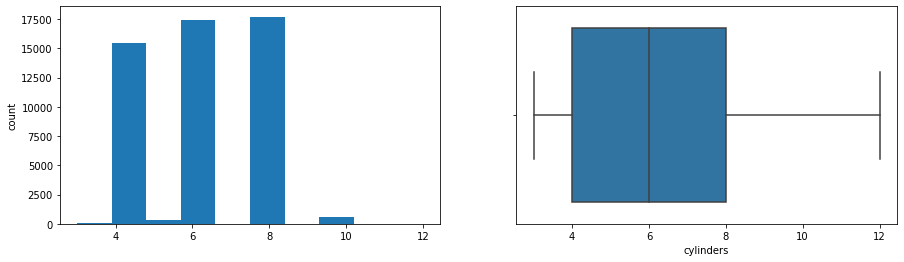

odometer_mean
Skew : -0.15


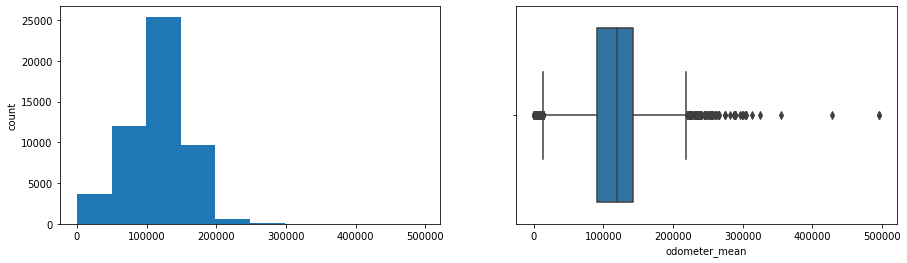

days_listed
Skew : 1.44


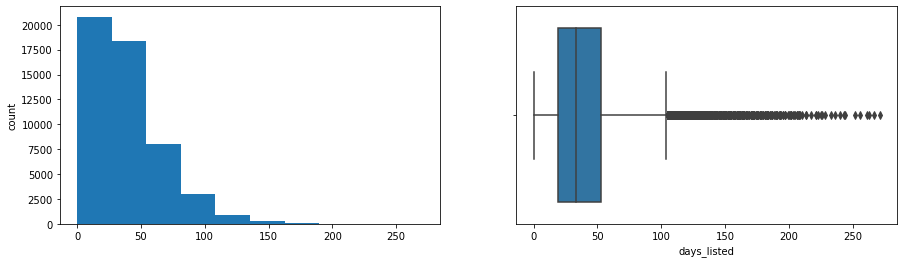

In [64]:
# histogram plot of the frquency of our feature data columns

columns = ['price' , 'cylinders' ,'odometer_mean' ,'days_listed']

for col in columns:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x = col , data = data)
    plt.show()

In [65]:
data['date_posted']

0       2018-06-23
1       2018-10-19
2       2019-02-07
3       2019-03-22
4       2019-04-02
           ...    
51520   2018-10-03
51521   2018-11-14
51522   2018-11-15
51523   2018-07-02
51524   2018-06-05
Name: date_posted, Length: 51525, dtype: datetime64[ns]

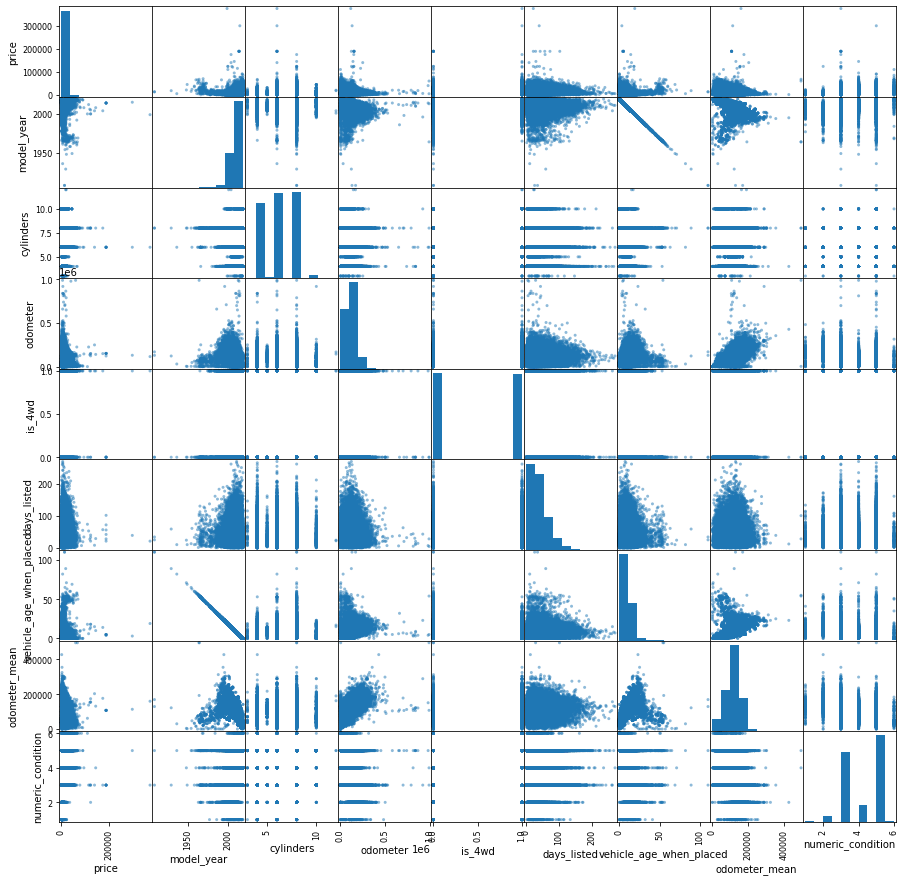

In [66]:
# Big Scatter_Matrix !
pd.plotting.scatter_matrix(data, figsize=(15,15))
plt.show()

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You can add plt.show() on the last line to remove useless information from output
</div>

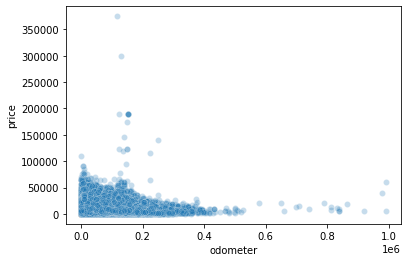

In [67]:
# Scatter Plot for milage & Price
sns.scatterplot(data=data, x='odometer', y='price', alpha = .25)
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Let's add an alpha parameter to make our dots translucent, it helps us find clusters of data much easier :)
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Much better now!
</div>

In [68]:
# updated as suggested

In [69]:
# Definetly some outliers in Odometer and price to take a closer look at.

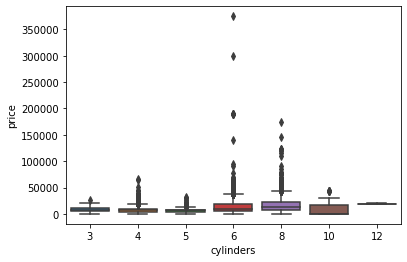

In [70]:
# Box Plot for Condition & Price
sns.boxplot(data=data, x='cylinders', y='price');

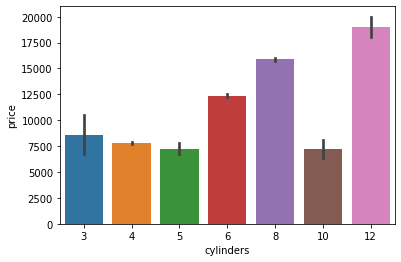

In [71]:
# Bar Plot for number of cylinders & Price
sns.barplot(data=data, x='cylinders', y='price')
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

That's cool that you use barplot from seaborn, it is very beautiful👍
</div>

In [72]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_listed_dt_delta,datetime_days_listed,vehicle_age_when_placed,odometer_mean,numeric_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,19 days,2018-07-12,7,106974.111111,3
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,50 days,2018-12-08,7,128403.014528,3
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,79 days,2019-04-27,6,109013.549020,4
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,unknown,0,2019-03-22,9,9 days,2019-03-31,16,169081.214286,2
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,28 days,2019-04-30,2,81927.250000,5


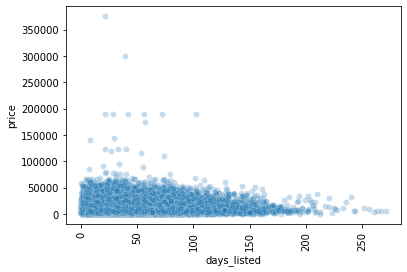

In [73]:
# days_listed
# Scatter Plot for number of days_listed & Price
plt.xticks(rotation = 90)
sns.scatterplot(data=data, x='days_listed', y='price', alpha = .25)
plt.show()

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

And here, let's add an alpha parameter
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

👍
</div>

Updated as suggested

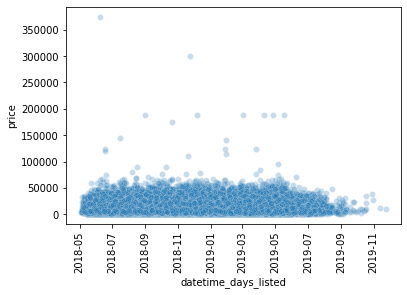

In [74]:
# Scatter Plot for number of datetime_days_listed & Price
plt.xticks(rotation = 90)
sns.scatterplot(data=data, x='datetime_days_listed', y='price', alpha = .25)
plt.show()

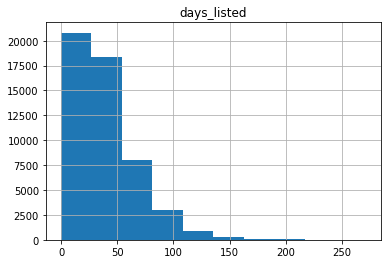

In [75]:
# 'days_listed' Hist()
data.hist('days_listed');

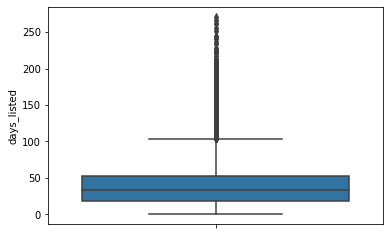

In [76]:
# 'days_listed' Boxplot
sns.boxplot(y = 'days_listed', data = data);

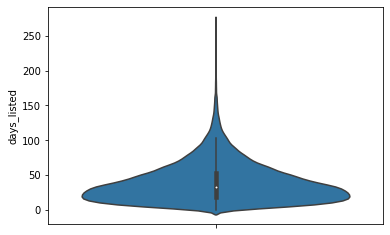

In [77]:
sns.violinplot(y = 'days_listed', data = data);

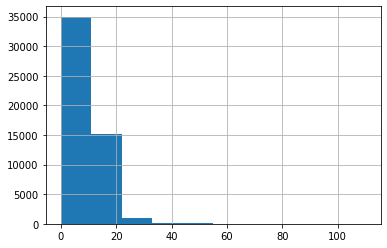

In [78]:
# vehicle_age_when_placed
data['vehicle_age_when_placed'].hist()
plt.show()

## Study and treat outliers


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   price                    51525 non-null  int64          
 1   model_year               51525 non-null  int64          
 2   model                    51525 non-null  object         
 3   condition                51525 non-null  object         
 4   cylinders                51525 non-null  int64          
 5   fuel                     51525 non-null  object         
 6   odometer                 51525 non-null  int64          
 7   transmission             51525 non-null  object         
 8   type                     51525 non-null  object         
 9   paint_color              51525 non-null  object         
 10  is_4wd                   51525 non-null  int64          
 11  date_posted              51525 non-null  datetime64[ns] 
 12  days_listed       

In [80]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_listed_dt_delta,datetime_days_listed,vehicle_age_when_placed,odometer_mean,numeric_condition
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,19 days,2018-07-12,7,106974.111111,3
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,50 days,2018-12-08,7,128403.014528,3
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,79 days,2019-04-27,6,109013.549020,4
3,1500,2003,ford f-150,fair,8,gas,121928,automatic,pickup,unknown,0,2019-03-22,9,9 days,2019-03-31,16,169081.214286,2
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,28 days,2019-04-30,2,81927.250000,5


In [81]:
# Filtering for columns with numerical values
int_cols = data.select_dtypes(include=['int']).columns
data[int_cols] = data[int_cols].astype(float)

In [82]:
# Determine the lower limits for outliers
# Determine the upper limits for outliers

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


In [83]:

#columns = ['price' , 'cylinders' ,'odometer_mean' ,'days_listed']

df1 = remove_outlier(data, 'price')
df2 = remove_outlier(df1, 'cylinders')
df3 = remove_outlier(df2, 'odometer_mean')
df4 = remove_outlier(df3, 'days_listed')

In [84]:
# Store data without outliers in a separate DataFrame
data_no_ouliers = df4.copy()

## Study core parameters without outliers

price
Skew : 0.89


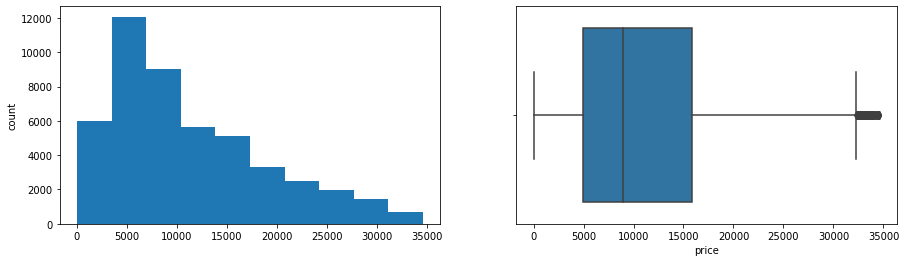

cylinders
Skew : 0.05


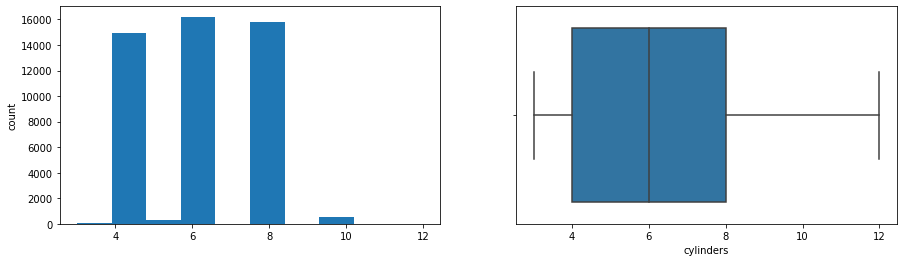

odometer_mean
Skew : -0.3


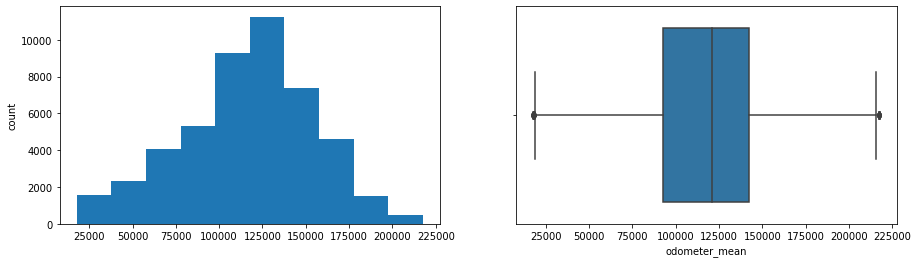

days_listed
Skew : 0.73


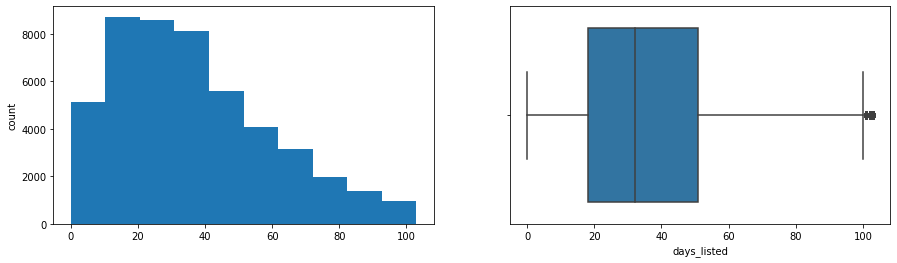

In [85]:
# histogram plot of the frquency of our feature data columns

columns = ['price' , 'cylinders' ,'odometer_mean' ,'days_listed']

for col in columns:
    print(col)
    print('Skew :',round(data_no_ouliers[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data_no_ouliers[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x = col , data = data_no_ouliers)
    plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Beautiful👍
</div>

## Ads lifetime

In [86]:
# How many days was an advertisements displayed?
# Days_listed column based on mean and median lifetime of an ad. 
print('mean : ',data_no_ouliers['days_listed'].mean())
print('median : ',data_no_ouliers['days_listed'].median())

mean :  36.54021352313167
median :  32.0


## Average price per each type of vehicle

In [87]:
# Analyze the number of ads and the average price for each type of vehicle.  
# Select the two types with the greatest number of ads.

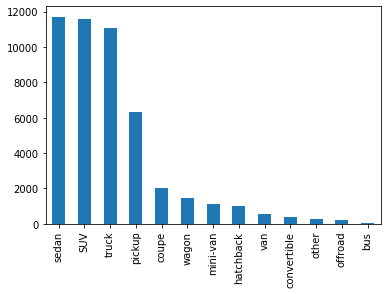

In [88]:
# Plot a graph showing the dependence of the number of ads on the vehicle type.
data_no_ouliers['type'].value_counts().plot(kind = 'bar');

In [89]:
data_no_ouliers.groupby('type').mean()['price']

type
SUV            10413.523008
bus            17135.666667
convertible    12585.771712
coupe          12848.465593
hatchback       6824.977137
mini-van        8017.823105
offroad        13338.533333
other          10473.430328
pickup         14624.559458
sedan           6940.668915
truck          14878.226264
van             8572.312057
wagon           8961.179063
Name: price, dtype: float64

In [90]:
# SUVs and sedans are our two more prominant ad types

## Price factors

In [91]:
# Check Price reletave to age, odometer, condition using scatterplots
# Check Transmission type and color using plot box-and-whisker charts - must have at least 50 ads to be valid

In [111]:
# Createa a SUV & sedan only Dataframe
  
# making filter for 'SUV'
df_SUV_filter = data_no_ouliers[data_no_ouliers["type"] == 'SUV']
  
# # making filter for 'sedan'
df_sedan_filter = data_no_ouliers[data_no_ouliers["type"] == 'sedan']

#display(filter2)
data_no_ouliers_suv_sedan = pd.concat([df_SUV_filter, df_sedan_filter], axis=0)
#display(data_no_ouliers_suv_sedan)
#data_no_ouliers_suv_sedan.info()

In [112]:
# This block of code works in google colab, but not JupyterHub
# This version of Jupter hub is python '3.9.5'
# Google Colab is currently running python '3.7.13'

# Createa a SUV & sedan only Dataframe
  
# making filter for 'SUV'
#filter1 = data_no_ouliers["type"] == 'SUV'
  
# # making filter for 'sedan'
#filter2 = data_no_ouliers["type"] == 'sedan'

# filtering data
#data_no_ouliers_suv_sedan = data_no_ouliers.where(filter1 | filter2, errors= 'ignore').dropna()

In [ ]:
# Updated Code for current version of Python

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Here is an error :(
    
Can you fix it, please, so I can continue my review🤔
</div>

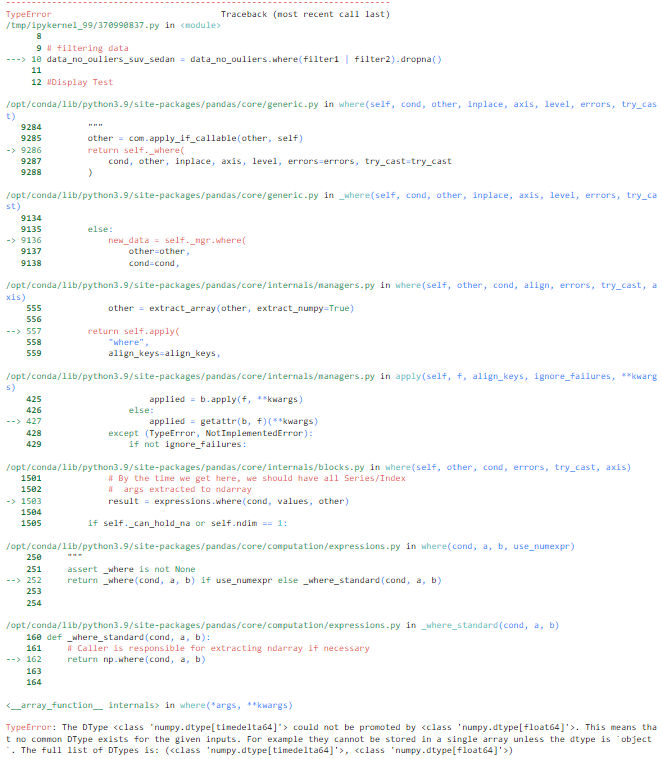

That's weird, it works in Google Colab... hmm...
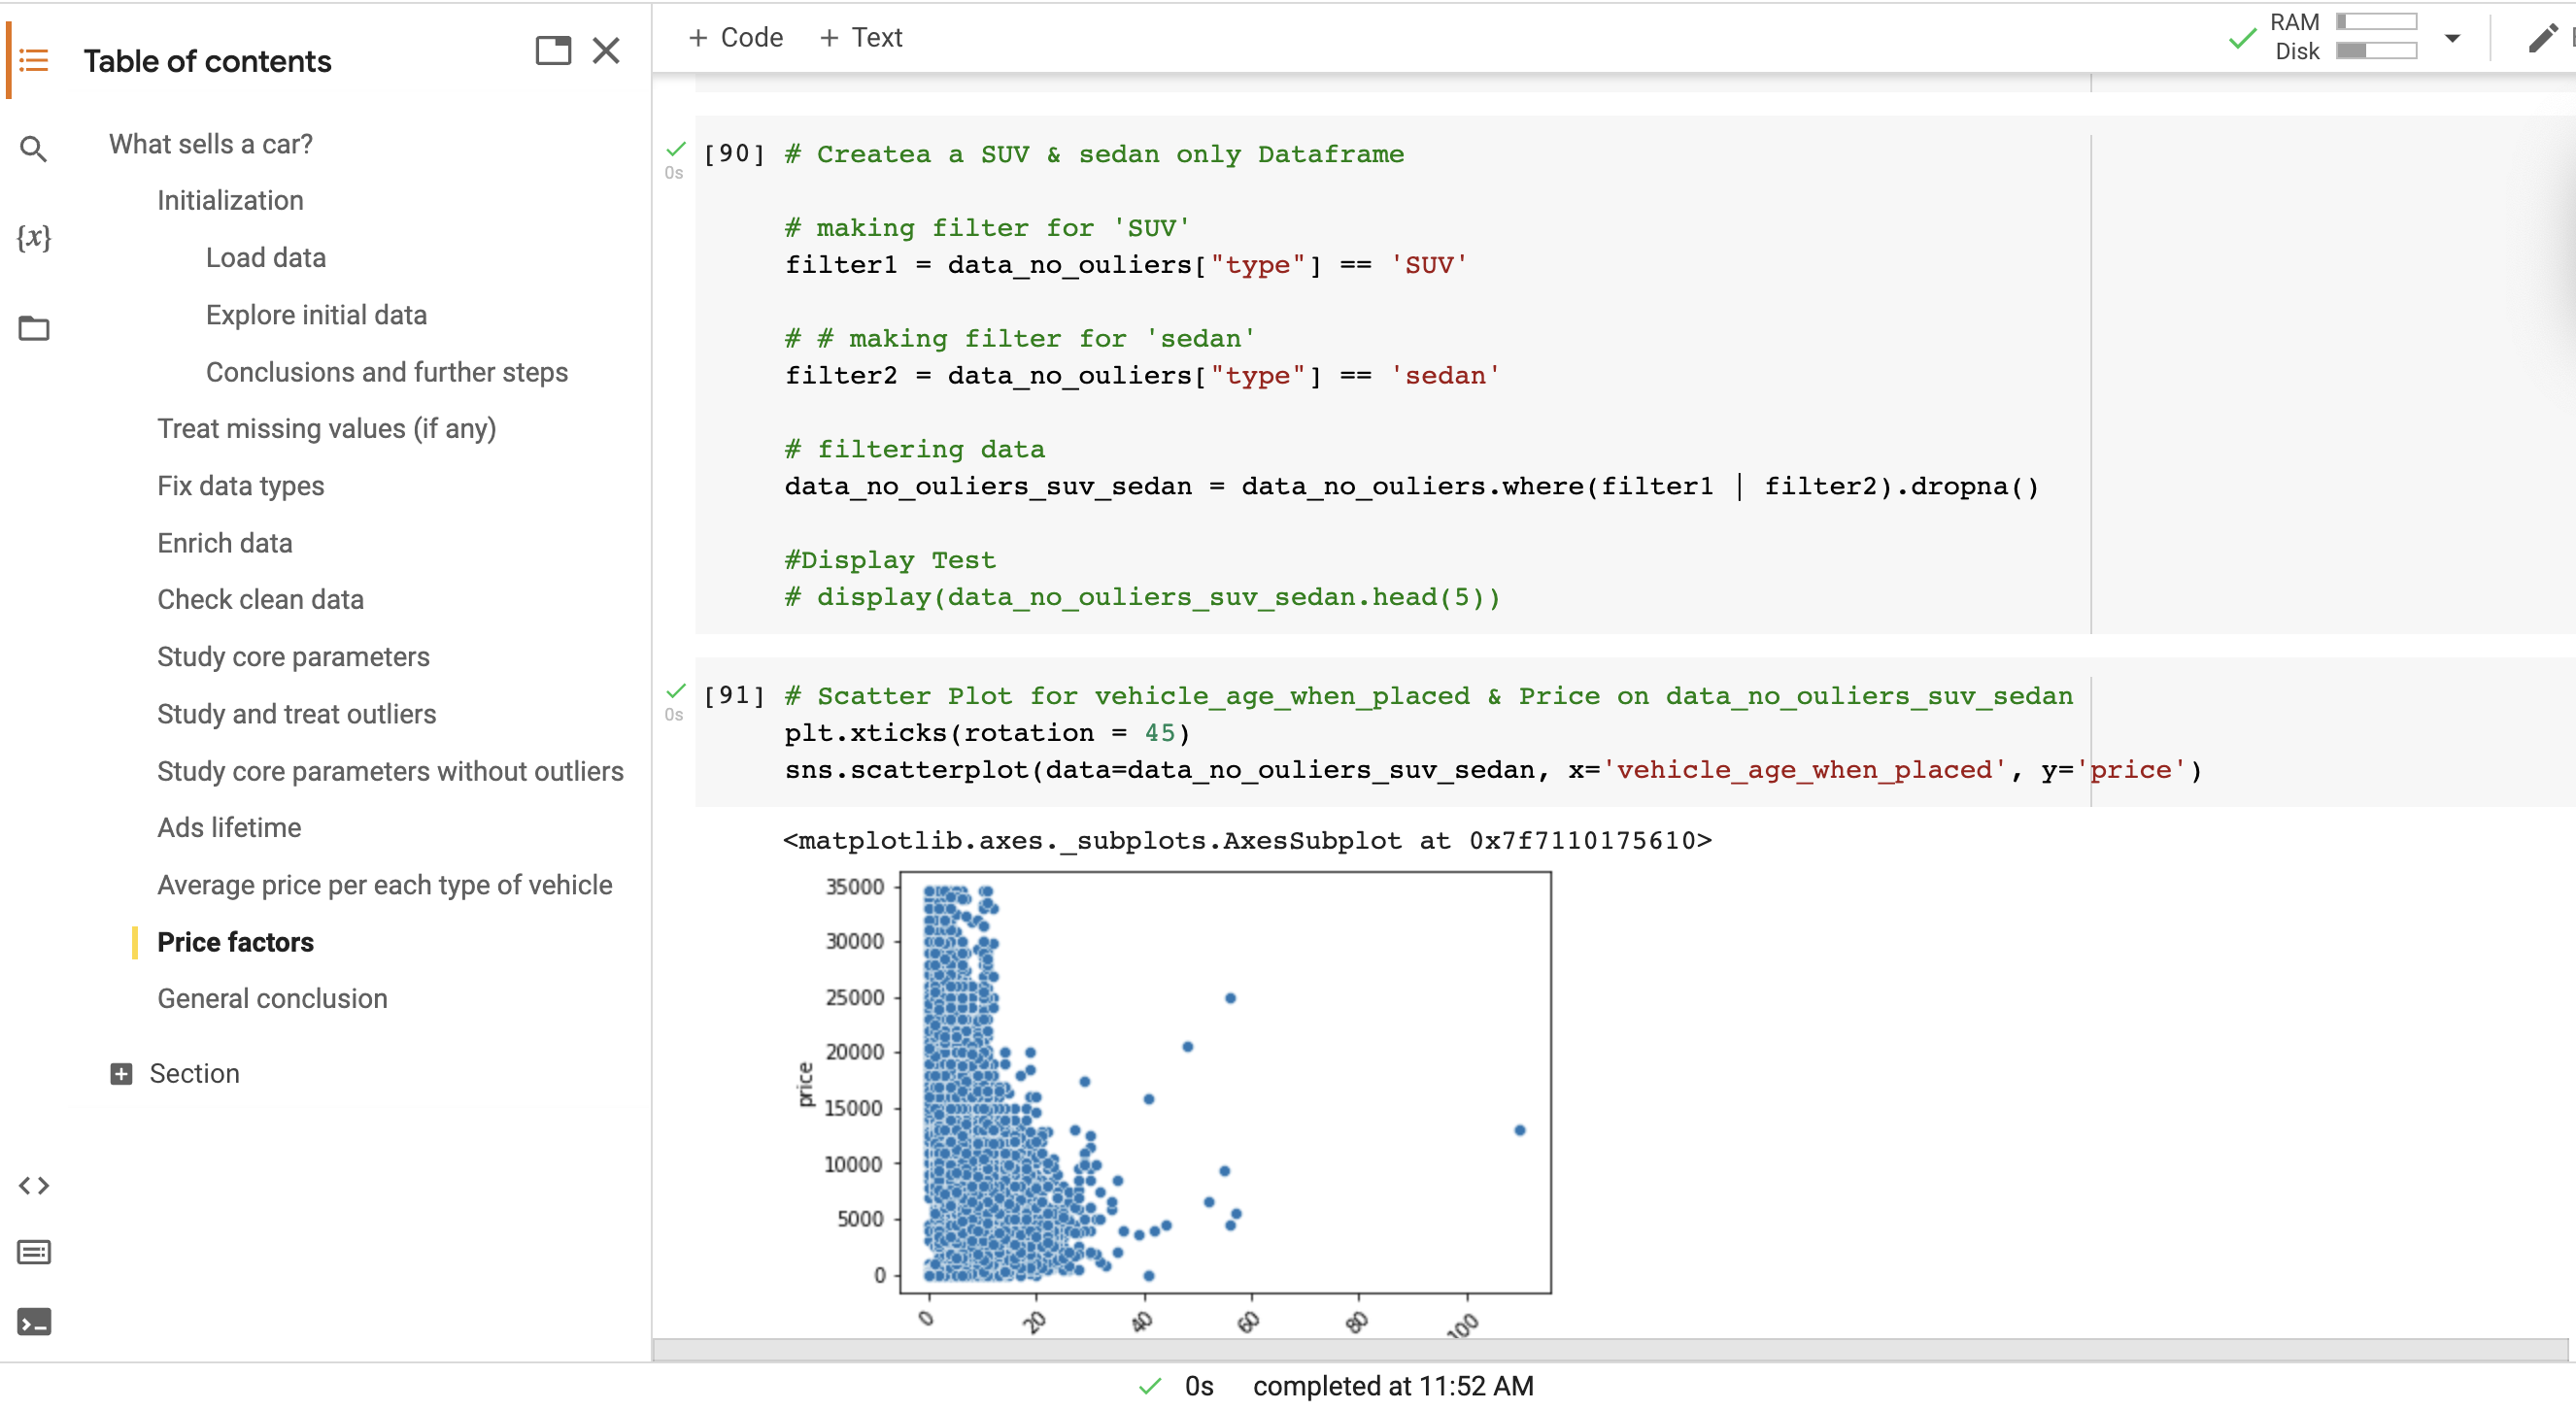

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

I think this is due to the fact that we have different versions of the libraries
</div>

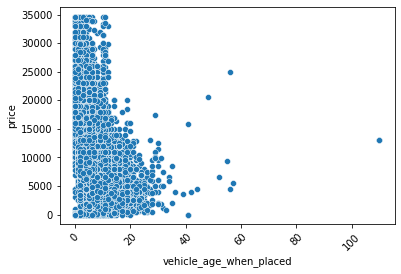

In [114]:
# Scatter Plot for vehicle_age_when_placed & Price on data_no_ouliers_suv_sedan
plt.xticks(rotation = 45)
sns.scatterplot(data=data_no_ouliers_suv_sedan, x='vehicle_age_when_placed', y='price')
plt.show()

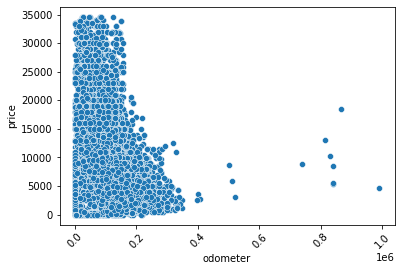

In [115]:
# Scatter Plot for odometer & Price on data_no_ouliers_suv_sedan
plt.xticks(rotation = 45)
sns.scatterplot(data=data_no_ouliers_suv_sedan, x='odometer', y='price')
plt.show()

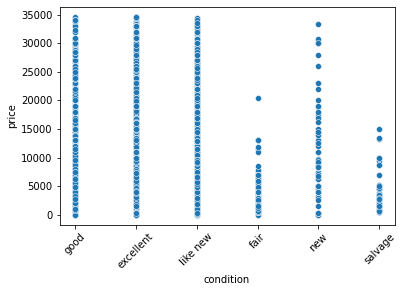

In [116]:
# Scatter Plot for condition & Price on data_no_ouliers_suv_sedan
plt.xticks(rotation = 45)
sns.scatterplot(data=data_no_ouliers_suv_sedan, x='condition', y='price')
plt.show()

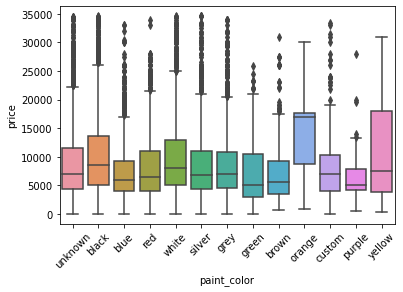

In [98]:
# SUV and sedan effect of color on price - plot box-and-whisker charts
plt.xticks(rotation = 45)
sns.boxplot(y = 'price', x = 'paint_color', data=data_no_ouliers_suv_sedan);

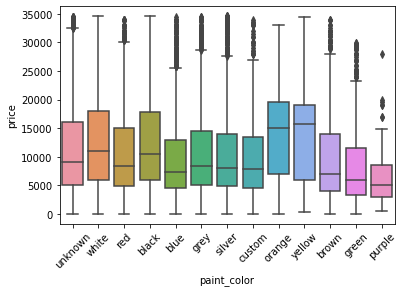

In [99]:
# All types and color - plot box-and-whisker charts
plt.xticks(rotation = 45)
sns.boxplot(y = 'price', x = 'paint_color', data=data_no_ouliers);

<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

That's cool!
</div>

In [100]:
# Note: It would be great if the chart colors corrilated with the column names.
# Advise welcome

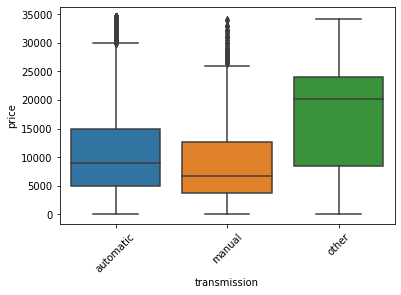

In [101]:
# All types for transmission - plot box-and-whisker charts - must have at least 50 ads to be valid
plt.xticks(rotation = 45)
sns.boxplot(y = 'price', x = 'transmission', data=data_no_ouliers);

In [102]:
# must have at least 50 ads to be valid
data_no_ouliers['transmission'].value_counts()

automatic    43545
manual        2603
other         1622
Name: transmission, dtype: int64

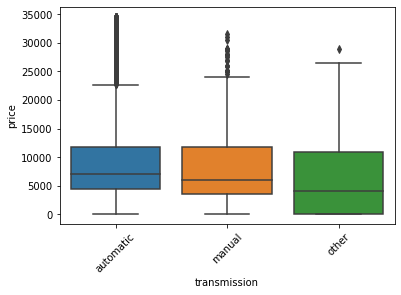

In [103]:
# SUV and sedan type for transmission - plot box-and-whisker charts - 
plt.xticks(rotation = 45)
sns.boxplot(y = 'price', x = 'transmission', data=data_no_ouliers_suv_sedan);

In [104]:
# must have at least 50 ads to be valid
data_no_ouliers_suv_sedan['transmission'].value_counts()

automatic    21970
manual        1042
other          284
Name: transmission, dtype: int64

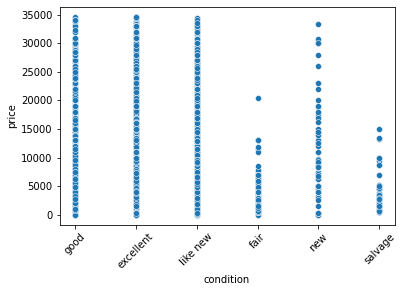

In [117]:
# Scatter Plot for condition & Price on data_no_ouliers_suv_sedan
plt.xticks(rotation = 45)
sns.scatterplot(data=data_no_ouliers_suv_sedan, x='condition', y='price')
plt.show()

price
Skew : 1.35


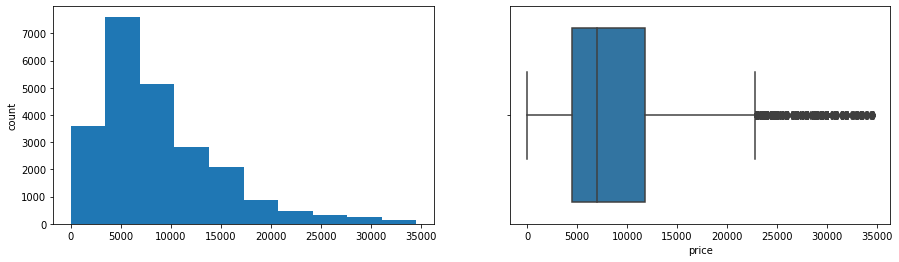

cylinders
Skew : 0.82


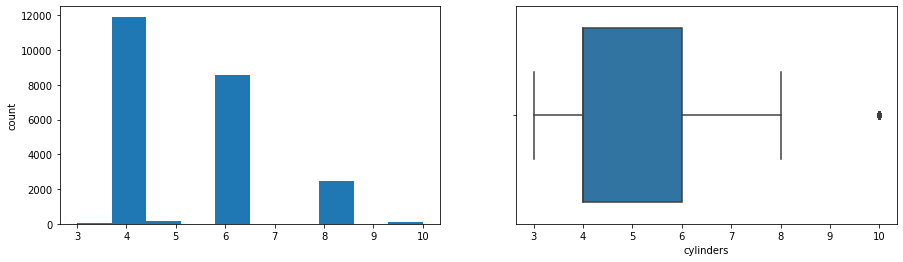

odometer_mean
Skew : -0.18


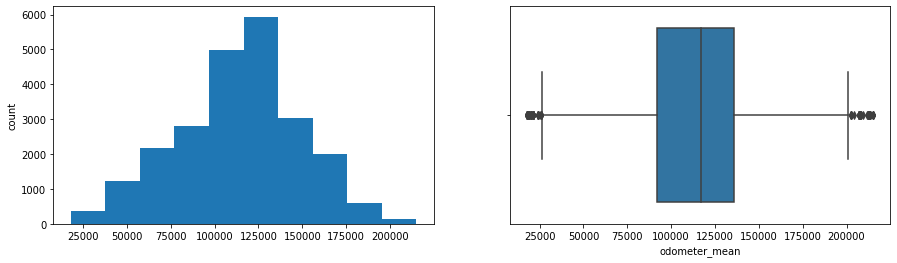

days_listed
Skew : 0.74


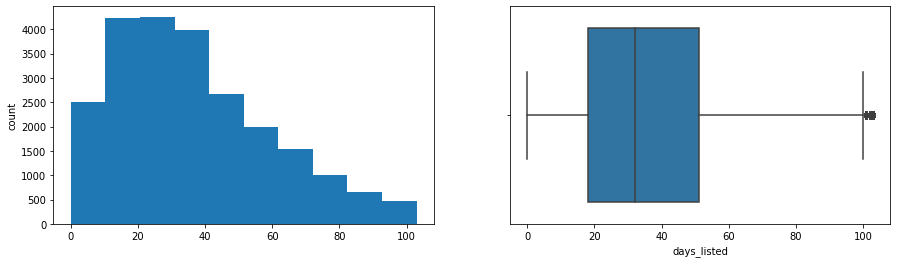

In [106]:
# histogram plot of the frquency of our feature data columns for SUV sedan

#Price depends on age, odometer, condition - scatterplots
# Transmission type and color - plot box-and-whisker charts - must have at least 50 ads to be valid

columns = ['price', 'cylinders', 'odometer_mean', 'days_listed']

for col in columns:
    print(col)
    print('Skew :',round(data_no_ouliers_suv_sedan[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data_no_ouliers_suv_sedan[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x = col , data = data_no_ouliers_suv_sedan)
    plt.show()

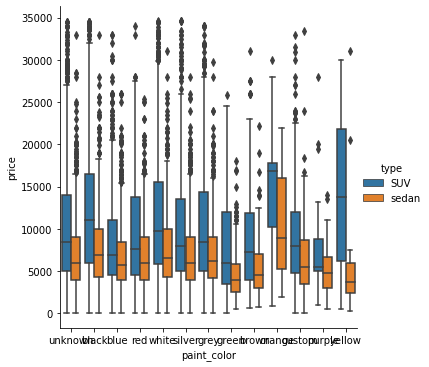

In [107]:
# Paint color and price, sorted by type SUV and sedan

# Why dosn't this rotation code work properly on this chart?

# plt.xticks(rotation = 45)
sns.catplot(x="paint_color", y="price", hue="type", kind="box", data=data_no_ouliers_suv_sedan)
plt.show()

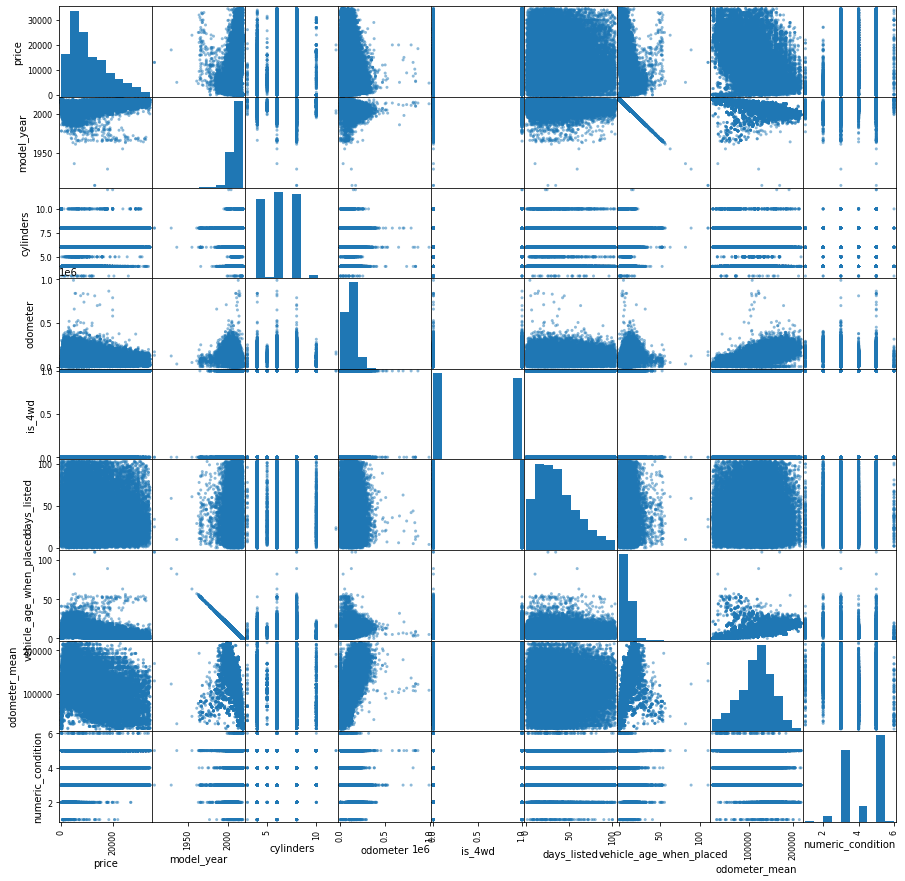

In [108]:
pd.plotting.scatter_matrix(data_no_ouliers, figsize = (15,15))
plt.show()

In [109]:
# dataframe no outlier corrilation
data_no_ouliers.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,vehicle_age_when_placed,odometer_mean,numeric_condition
price,1.000000,0.449457,0.303786,-0.387413,0.332650,0.003366,-0.448075,-0.445030,0.145318
model_year,0.449457,1.000000,-0.175718,-0.424589,0.011410,-0.001117,-0.996915,-0.660350,0.218230
cylinders,0.303786,-0.175718,1.000000,0.125381,0.403851,0.002447,0.175263,0.190505,-0.072820
odometer,-0.387413,-0.424589,0.125381,1.000000,0.066610,-0.000835,0.423246,0.645483,-0.190361
is_4wd,0.332650,0.011410,0.403851,0.066610,1.000000,0.003602,-0.011614,0.103985,0.020532
days_listed,0.003366,-0.001117,0.002447,-0.000835,0.003602,1.000000,0.001689,0.000571,0.000075
vehicle_age_when_placed,-0.448075,-0.996915,0.175263,0.423246,-0.011614,0.001689,1.000000,0.657860,-0.217856
odometer_mean,-0.445030,-0.660350,0.190505,0.645483,0.103985,0.000571,0.657860,1.000000,-0.167779
numeric_condition,0.145318,0.218230,-0.072820,-0.190361,0.020532,0.000075,-0.217856,-0.167779,1.000000


In [110]:
# SUV and Sedan corrilation
data_no_ouliers_suv_sedan.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed,vehicle_age_when_placed,odometer_mean,numeric_condition
price,1.000000,0.496365,0.126556,-0.409085,0.260852,-0.009579,-0.494365,-0.473701,0.202536
model_year,0.496365,1.000000,-0.246869,-0.509306,-0.098456,-0.003933,-0.995803,-0.808864,0.249993
cylinders,0.126556,-0.246869,1.000000,0.196671,0.417372,0.008033,0.246280,0.303159,-0.056825
odometer,-0.409085,-0.509306,0.196671,1.000000,0.080358,0.000917,0.507134,0.629284,-0.227135
is_4wd,0.260852,-0.098456,0.417372,0.080358,1.000000,0.001180,0.098089,0.124014,0.014373
days_listed,-0.009579,-0.003933,0.008033,0.000917,0.001180,1.000000,0.004389,0.012702,-0.002305
vehicle_age_when_placed,-0.494365,-0.995803,0.246280,0.507134,0.098089,0.004389,1.000000,0.804849,-0.249342
odometer_mean,-0.473701,-0.808864,0.303159,0.629284,0.124014,0.012702,0.804849,1.000000,-0.228246
numeric_condition,0.202536,0.249993,-0.056825,-0.227135,0.014373,-0.002305,-0.249342,-0.228246,1.000000


<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Very good analysis👍
</div>

## General conclusion
<br>
** # Treat Missing Values** <br>
We treated Missing Values in: <br>
model_year       3619 - median Values based on model </br>
cylinders        5260 - median Values based on model <br>
odometer         7892 - median Values based on model  <br>
paint_color      9267 - Converted NaN to Unknown<br>
is_4wd          25953 - Converted NaN to 0 <br>
<br>
With Special Consideration for the 'mercedes-benz benze sprinter 2500', which had no odometer readings across the entire model, so we replaced with a mean value based on year. <br>
<br>
# Fix Data Types <br>
Converted 'is_4wd', 'cylinders' and 'odometer' to int <br>
Converted date posted to date time type <br>
# Encrich data
created a column for 'days_listed_dt_delta' as date time type <br>
created a column for 'vehicle_age_when_placed' <br>
and 'datetime_days_listed' <br>
created odometer mean based on car model <br>
Created a numerical condition for category type using .map()
# Confirmed data is clean <br>
# Studied Core Parameters <br>
We Use Hist(), Scatterplots and bar graphs for quantitative columns, and bargraphs and boxplots for categorical data. <br>
# Study and treat outliers <br>
Filtered for columsns with numerical values for outliers <br>
Ads lifetime <br>
# Price factors <br>
SUVs and sedans are our two most priminant ad types <br>
Vehicle age, odometer, and model year all have strong corrilation collectively <br>
These variables have strong corrilation with price <br>
# Summary: <br>
The age of the vehicle and how far it has been driven strongly effect the price of the vehicle. <br>
The trend holds true for our most popular types, SUV and sedans. <br>



<div class="alert alert-block alert-success">
<b>Reviewer's comment 2</b> <a class="tocSkip"></a>

Structured and informative general conclusion👍
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's conclusion</b> <a class="tocSkip"></a>

Yoav, thank you for your project! You did really good job. I see that you have great knowledge in the analysis and visualization😊
</div>